In [3]:
### If False, takes a sample size from the 1.2 GB trade time series data, otherwise it takes the the whole set
BIG_DATA = True

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import this
# I downloaded the total bitcoin price history on the btce exchance which comprised
# of a 1.2GB csv file. When I read it in it will need to be read in by chunks like this
#f = pd.read_csv('btceUSD.csv',chunksize=5)
btce = pd.read_csv('data/btceUSD.csv', 
                   names = ['timestamp','price','amount'])

In [219]:
# Pick some random rows to index by and then sort them to cut down on the massive size
import random
btce

,timestamp,price,amount
0,1313331280,10.400,0.779000
1,1313334917,10.400,0.101000
2,1313334917,10.400,0.316000
3,1313340309,10.500,1.800000
4,1313340309,10.500,0.150000
5,1313340895,10.500,2.110000
6,1313340895,10.500,4.890000
7,1313341133,10.500,0.430000
8,1313341218,10.500,1.040000
9,1313341475,10.500,2.788380


In [6]:
print len(btce)
if not BIG_DATA: 
    btce_slicer = np.random.choice(btce.index, len(btce)/100, replace = False)
    btce_slicer
    btce_slicer = np.sort(btce_slicer)
    btce = btce.iloc[btce_slicer]
print len(btce)

array([ 8414867,  1692053, 23979918, ...,  3216634, 28830453, 13136902])

In [235]:
print type(btce['timestamp'])
print type(btce.timestamp)
print type(np.array(btce.timestamp))
x = np.array(btce.timestamp)
y = np.array(btce.price)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


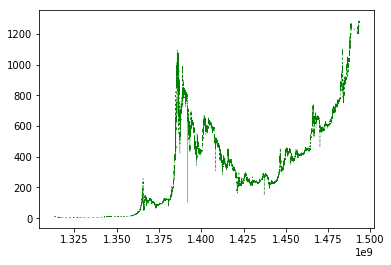

In [237]:
plt.plot(x,y,color='g',linestyle='dotted',lw=0.5)
## or plt.scatter
plt.show()

In [17]:
## I want to show a subplot in the upper left hand side of the zoomed 
## in range from around 1.28 to 1.400...
### I didn't see how to do this in the matplotlib gallery and instead will opt to display the main plot followed
### by a lot of individual plots or I found an example that shows 4 plots in one. I could also do a ggplot facet_wrap
### in R

In [220]:
### Load the other data set that shows the news markers (processing done in separate jupyter notebook)
news = np.load('data/news_markers_99BC.npy').item()
print (len(news))
news


61


{0: '"x":1231006505000,"id":"22725","day":1230940800,"time":"18:15:05","title":1,"text":"Genesis Block Established","price":null',
 1: '"x":1254700800000,"id":"22724","day":1254700800,"time":0,"title":2,"text":"New Liberty Standard Publishes First Exchange Rate","price":null',
 2: '"x":1255321278000,"id":"22723","day":1255305600,"time":"04:21:18","title":3,"text":"The First Bitcoin-to-Fiat Exchange Occurs","price":null',
 3: '"x":1274486400000,"id":"22722","day":1274486400,"time":0,"title":4,"text":"Two Pizzas Are First Material Item Purchased Using Bitcoin","price":null',
 4: '"x":1278806400000,"id":"22721","day":1278806400,"time":0,"title":5,"text":"Bitcoin Posted on Slashdot","price":null',
 5: '"x":1279418239000,"id":"22720","day":1279411200,"time":"01:57:19","title":6,"text":"Mt. Gox Opens For Business","price":0.07',
 6: '"x":1281848757000,"id":"22719","day":1281830400,"time":"05:05:57","title":7,"text":"Bitcoin Protocol Bug Causes Hard Fork","price":0.07',
 7: '"x":1297281600000

In [229]:
news[0]

'"x":1231006505000,"id":"22725","day":1230940800,"time":"18:15:05","title":1,"text":"Genesis Block Established","price":null'

In [230]:
#### Need to take each string from the dictionary and extract the 'day' and 'price'
import re
day = re.compile('day":(.{10})')
print day.search(news[0]).groups()[0]
price = re.compile('price":(.*)')
print price.search(news[0]).groups()[0]
textreg = re.compile('text":(.*",$)')
textreg = re.compile('"text":"(.*)",')
a = textreg.search(news[0]).groups()[0]
#print news[0][a.start():a.end()]
print a
                   

1230940800
null
Genesis Block Established


In [231]:
##Extract the time series data
news_timestamp = np.empty(61)
news_prices=np.empty(61)
news_titles = np.array(np.empty(61), dtype='string')
dayreg = re.compile('day":(.{10})')
pricereg = re.compile('price":(.*)')
textreg = re.compile('text":(".*"),')
for i in news:
    print i
    news_timestamp[i]=dayreg.search(news[i]).groups()[0]
    price=pricereg.search(news[i]).groups()[0]
    title = textreg.search(news[i]).groups()[0]
    #print title
    #Some prices are the string 'null'
    if price == 'null':
        price = np.nan
    news_prices[i]= price
    news_titles[i] = title

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [232]:
### Now throw these two numpy arrays in to a data frame
### Probably should have just saved it as a dataframe to begin with on the other hand, 
### now I have all the other data as well. so I might as well add it in the data frame! Trusty data frames!
df = pd.DataFrame([news_timestamp,news_prices, news_titles]).T
df.columns = ['timestamp','price', 'title']
df

,timestamp,price,title
0,1.23094e+09,NaN,"""Genesis Block Established"""
1,1.2547e+09,NaN,"""New Liberty Standard Publishes"
2,1.25531e+09,NaN,"""The First Bitcoin-to-Fiat Excha"
3,1.27449e+09,NaN,"""Two Pizzas Are First Material I"
4,1.27881e+09,NaN,"""Bitcoin Posted on Slashdot"""
5,1.27941e+09,0.07,"""Mt. Gox Opens For Business"""
6,1.28183e+09,0.07,"""Bitcoin Protocol Bug Causes Har"
7,1.29721e+09,0.96,"""Bitcoin Price Hits $1.00 USD"""
8,1.30118e+09,0.83,"""Three New Exchanges Open Suppor"
9,1.30689e+09,9.21,"""Gawker Publishes Article About"


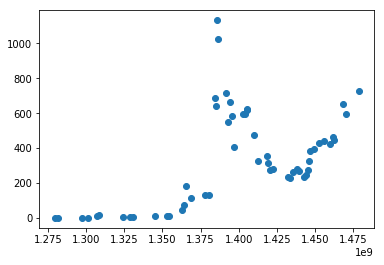

In [233]:
### Now plot these news events
plt.scatter(df.timestamp,df.price)
plt.show()

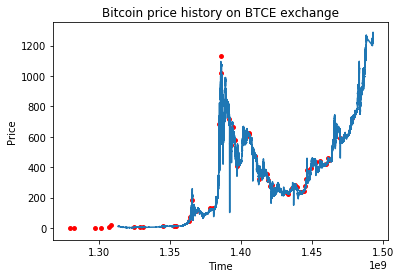

In [238]:
### Now plot both plots on the same graph
fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(df.timestamp,df.price,color='red',s=15)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title(r'Bitcoin price history on BTCE exchange')
plt.savefig('justhewayilikeit.png')
plt.show()

In [26]:
### Bringing together all the horizontal gridlines , two sets of points, right linewidths and colors
s = 'my #1'
print 'good day to you {a} {b}'.format(a=s, b='maaabiatch')

good day to you my #1 maaabiatch


In [242]:
### Now I want to see plots of the 10 days after major news events affecting bitcoin
### First I need to creat all these plots to see what we're dealing with
#### The best way I can think of is to convert manually the number of days into seconds
secs_in_a_day = 60*60*24
### Now I need to add this amount to each point to view.
### First things first though I should really look at the mean distance between news events
news_freq = np.array([df.timestamp[i] - df.timestamp[i-1] for i in range(1, len(df.timestamp))])
print np.mean(news_freq)
print np.std(news_freq)
print np.median(news_freq)
### How many days is the average
print np.mean(news_freq)/secs_in_a_day
### How many of the news_freq's are below 10 days?
np.sum([i < 47.783333 for i in news_freq])
### Actually having zero is odd to me, This implies that the probability of news events over time is not valid for this case
### Possibly the maintainer of the site spread out the news events?
### how to determine of the news events are worthy?
### Still they seem like a good thing to start with before trying to scrape another news source. 
### I also need to get the NLP analysis of the text in place
### I'm definitely going to use Python as long as the NLP polarity code doesn't throw any big curveballs
### Ok now that I have the news_freq, I can find the xrange to plot over for a shit ton of plots
### Now I'll put the ranges in a list of lists
subplot_ranges = [[df.timestamp[i],df.timestamp[i] + 10*secs_in_a_day] for i in range(len(df.timestamp))] 
subplot_ranges[:5]


4128480.0
4828260.30384
2419200.0
47.7833333333


[[1230940800.0, 1231804800.0],
 [1254700800.0, 1255564800.0],
 [1255305600.0, 1256169600.0],
 [1274486400.0, 1275350400.0],
 [1278806400.0, 1279670400.0]]

In [ ]:
## Slice y data by these ranges
## I'll create a nice for loop to do it. Plot every plot with correct labels

## Preliminary stuff
## Set axis aesthetics
fig, ax = plt.subplots()
 
ax.set_xlabel('Time (seconds since 1/1/1970)')
ax.set_ylabel('Price')
ax.set_title(r'Bitcoin price history on BTCE exchange subplot')

start = 11
linear_fits = []
    
for i in range(start, len(subplot_ranges)):
    
    xmin = subplot_ranges[i][0]
    xmax = subplot_ranges[i][1]
    
    # I could optimize this line by computing the proper indexes before hand
    x = np.array(btce.iloc[list((btce.timestamp > xmin) & (btce.timestamp < xmax))].timestamp)
    
    ### Make sure that we grabbed some data
    if len(x) == 0:
        continue
        
    print 'length of elements ' + str(i) + ', ' + str(len(x))
        
    y = np.array(btce.iloc[list((btce.timestamp > xmin) & (btce.timestamp < xmax))].price)
    
    #All the data
    ax.plot(x,y,linewidth=0.3)
    
    #The annotation point
    ax.scatter(df.timestamp[i],df.price[i],s=25)
    
    #Annotate the point
    plt.text(df.timestamp[i], df.price[i], df.title[i])
    
    #Fit then plot the fitted line
    #slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    fit = stats.linregress(x,y)
    linear_fits.append(fit)
    #fit_label = 'slope = {a}, r_value = {b}, p_value = {c}, std_err = {d}'.format(a=str(fit.slope),b=str(fit.rvalue),
                                                                            #     c=str(fit.pvalue),d=fit.stderr)
    ax.plot(x, fit.intercept + fit.slope*x, 'r', label= 'fitted line')
    
    # grid labels y=Constant
    for ymaj in ax.yaxis.get_majorticklocs():
        ax.axhline(y=ymaj,ls='-', linewidth=0.4)
    
    ## Legend!
    #ax.legend( [str(slope), str(intercept), str(r_value)],
     #      ('slope', 'intercept', 'r_value'),
     #      'upper right' )
    ### Calculate proper text gap (10% of y plot size?)
    text_gap = (ax.get_ylim()[1] - ax.get_ylim()[0])/12
    xplot = ax.get_xlim()[0]
    
    ax.text(xplot, ax.get_ylim()[1] - text_gap, 'slope={a}'.format(a=str(fit.slope)), color='green', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
    ax.text(xplot, ax.get_ylim()[1]-text_gap*2, 'intercept={a}'.format(a=str(fit.intercept)), color='green', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
    ax.text(xplot, ax.get_ylim()[1]-text_gap*3, 'pvalue={a}'.format(a=str(fit.pvalue)), color='green', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
    ax.text(xplot, ax.get_ylim()[1]-text_gap*4, 'rvalue={a}'.format(a=str(fit.rvalue)), color='green', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
    ax.text(xplot, ax.get_ylim()[1]-text_gap*5, 'stderr={a}'.format(a=str(fit.stderr)), color='green', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
    
    #ax.legend()
    
    #Dummy string for plot save file
    __ = 'figures/BTCE_and_news{num}.png'.format(num=str(i))    
    plt.savefig(__)
    ax.clear()
    #### DEBUGGING
    #if i > 10:
    #    break

#plt.show()
plt.close()
linear_fits
    

length of elements 11, 1416
length of elements 12, 1662
length of elements 13, 1522
length of elements 14, 5730
length of elements 15, 5054
length of elements 16, 6454
length of elements 17, 21674


In [257]:
from scipy import stats
#uu = np.random.random(10)
#vv = np.array([math.sin(i) for i in uu])
x = list(df.timestamp)
### Manually remove some pesky nans
df.price[0:5] = 0.01
y = list(df.price)
#print len(df.timestamp), len(df.price), type(df.timestamp), type(df.price)
#print type(uu)
#s_fit = stats.linregress(x,y)
s_fit = stats.linregress(x, y)
#print s_fit
print s_fit


LinregressResult(slope=2.6371508299023871e-06, intercept=-3343.7976699018636, rvalue=0.6008039697214459, pvalue=3.0696299544270357e-07, stderr=4.5681289372164839e-07)


In [175]:
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(12345678)
x = np.random.random(10)
y = np.random.random(10)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
a = stats.linregress(x,y)
print slope,intercept,r_value,p_value,std_err

0.344864260747 0.268578235245 0.283552937807 0.427239426468 0.412351890903


In [282]:
import math
plt.close()
fig, ax = plt.subplots()
 
ax.set_xlabel('Time (seconds since 1/1/1970)')
ax.set_ylabel('Price')
ax.set_title(r'Bitcoin price history on BTCE exchange subplot')
# grid labels y=Constant
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj,ls='-', linewidth=0.4)
    
x = np.linspace(0,5,35)

y1 = np.array([math.sin(i) for i in x])
y2 = np.array([math.cos(i) for i in x])

ax.plot(x,y1)
#ax.plot(x,y2)
#plt.show()

In [284]:
ax.clear()
ax.plot(x,y1)
ax.scatter(x,y2)
lim = ax.get_ylim()
plt.show()
print lim

(-1.1318755245411345, 1.1332986907508751)


In [ ]:
### Just make a function of my preferred plot settings at this point. I think that perhaps plotting is faster when
### I just set the lables and grid first? Seems like it shouldn't matter but setting up this way to check. 
def plot_price_and_news(x,y,SHOW=False,identifier=''):
    fig, ax = plt.subplots()
    ax.set_xlabel('Time (seconds since 1/1/1970)')
    ax.set_ylabel('Price')
    ax.set_title(r'Bitcoin price history on BTCE exchange')

    for ymaj in ax.yaxis.get_majorticklocs():
      ax.axhline(y=ymaj,ls='-', linewidth=0.4)
    #for ymin in ax.yaxis.get_minorticklocs():
    #  ax.axhline(y=ymin,ls='--')   
    
    
    xmin = subplot_ranges[i][0]
    xmax = subplot_ranges[i][1]
    #Slice the data
    x = btce.iloc[list((btce.timestamp > xmin) & (btce.timestamp < xmax))].timestamp
    y = btce.iloc[list((btce.timestamp > xmin) & (btce.timestamp < xmax))].price
    
    __ = 'BTCE_and_news{s}.png'.format(s=identifier)
    
    ax.plot(x,y,linewidth=0.5)
    ax.scatter(df.timestamp,df.price,color='red',s=9)
    
    plt.savefig(__)
    if SHOW:
        plt.show()


In [31]:
plot_price_and_news(x,y,False,'test')

In [52]:
x= btce.iloc[list(btce.timestamp < 1316334918)].timestamp
y= btce.iloc[list(btce.timestamp < 1316334918)].price
x2= btce.iloc[list(btce.timestamp > 1316334918)].timestamp
y2= btce.iloc[list(btce.timestamp > 1316334918)].price

In [53]:
print len(btce)
print len(x)
print len(y)
print len(x2)
print len(y2)


29840202
1777
1777
29838425
29838425


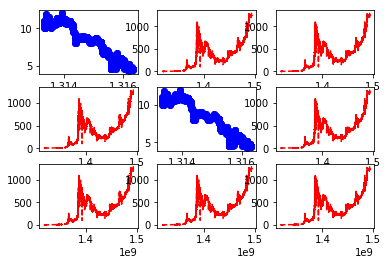

In [59]:
### Definitely easy
plt.figure(2)
plt.subplot(331)

plt.subplot(331)
plt.plot(x, y, 'bo')

plt.subplot(332)
plt.plot(x2,y2, 'r--')

plt.subplot(333)
plt.plot(x2,y2, 'r--')

plt.subplot(334)
plt.plot(x2,y2, 'r--')

plt.subplot(335)
plt.plot(x, y, 'bo')

plt.subplot(336)
plt.plot(x2,y2, 'r--')

plt.subplot(337)
plt.plot(x2,y2, 'r--')

plt.subplot(338)
plt.plot(x2,y2, 'r--')

plt.subplot(339)
plt.plot(x2,y2, 'r--')

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'